# Visualization helper stuff

In [38]:
import matplotlib.pyplot as plt
import cv2

from ultralytics import YOLO
%matplotlib inline

def display_annotated_image(result):

    # Get the plotted image as a numpy array
    img_annotated = results[0].plot()  
    img_rgb = cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB)

    # Display inline in the notebook
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()
    
class_names = {
    0: "cup",
    1: "timmies"
}

def get_color_for_class(cls):
    """
    Returns a color (as an (R, G, B) tuple) based on the class.
    Modify the colors as needed.
    """
    colors = [
        (255, 0, 0),    # Red
        (0, 255, 0),    # Green
        (0, 0, 255),    # Blue
        (255, 255, 0),  # Yellow
        (255, 0, 255),  # Magenta
        (0, 255, 255)   # Cyan
    ]
    # Use modulo in case the class index is higher than the list length.
    return colors[int(cls) % len(colors)]

def get_color_for_label(label):
    """
    Returns a color (as an (R, G, B) tuple) based on the class label.
    Modify the colors as needed.
    """
    color_map = {
        "paper_cup": (255, 0, 0),  # Red
        "timmies": (0, 255, 0)     # Green
    }
    # Default to yellow if the label is not found
    return color_map.get(label, (255, 255, 0))


def put_bold_text(img, text, org, font, font_scale, thickness, color):
    """
    Draws text multiple times with slight offsets to simulate a bold effect.
    """
    offsets = [(0, 0), (1, 0), (0, 1), (-1, 0), (0, -1)]
    for offset in offsets:
        pos = (org[0] + offset[0], org[1] + offset[1])
        cv2.putText(img, text, pos, font, font_scale, color, thickness, lineType=cv2.LINE_AA)


def visualize_api_results(api_result, image_path):
    # Load the original image (BGR format)
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image not found or invalid image path.")
    
    # Convert to RGB for proper display with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Iterate over each prediction from the API result
    for pred in api_result['predictions']:
        bbox = pred['bbox']   # [x1, y1, x2, y2]
        cls = pred['label']   # class numeric class ID
        score = pred['confidence'] # confidence score
        x1, y1, x2, y2 = map(int, bbox)
        
        # Get the color based on the predicted class
        box_color = get_color_for_label(cls) #get_color_for_class(cls)
        
        # Draw a thicker bounding box (set thickness to 5)
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color=box_color, thickness=10)
        
        # Retrieve the class name using the dictionary and format the label text
        class_label = class_names.get(cls, str(cls))
        label_text = f"{class_label} {score:.2f}"
        
        # Choose a font and size for the text
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 6
        text_thickness = 5
        
        # Get text size to create a background rectangle for the label
        (text_w, text_h), _ = cv2.getTextSize(label_text, font, fontScale=font_scale, thickness=text_thickness)
        
        # Set the text origin just above the top-left corner of the bounding box
        text_x = x1
        text_y = y1 - 5  # small offset above the bounding box
        
        # Draw a filled rectangle as the background for the label text
        cv2.rectangle(
            img_rgb, 
            (text_x, text_y - text_h - 5), 
            (text_x + text_w, text_y), 
            box_color, 
            thickness=-1
        )
        
        # Use the helper function to simulate bold text for improved readability
        put_bold_text(img_rgb, label_text, (text_x, text_y - 5), font, font_scale, text_thickness, (0, 0, 0))
    
    # Display the annotated image inline with matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

# Convert to Torchscript

In [ ]:
# Load the YOLO11 model
model = YOLO("Timmies/train7/group1_train_best_weights.pt")

# Export the model to TorchScript format
model.export(format="torchscript", imgsz=640)  # creates 'yolo11n.torchscript'

# Test on different image formats

Loading Timmies\train7\group1_train_best_weights.torchscript for TorchScript inference...

image 1/1 C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\custom_copy_paste\anna_red_non_timmies_output\red_non_timmies_r1_anna_iphone_background_40.jpeg: 640x640 5 cups, 2 timmiess, 8.0ms
Speed: 16.7ms preprocess, 8.0ms inference, 184.8ms postprocess per image at shape (1, 3, 640, 640)


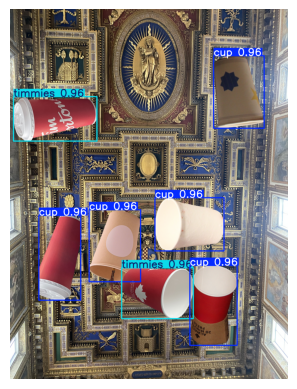

In [2]:
from ultralytics import YOLO

# Load the exported TorchScript model
torchscript_model = YOLO("Timmies/train7/group1_train_best_weights.torchscript",  task='detect')

# Run inference
results = torchscript_model("C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/custom_copy_paste/anna_red_non_timmies_output/red_non_timmies_r1_anna_iphone_background_40.jpeg");
display_annotated_image(results)


image 1/1 C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\edge_cases\IMG_1386.png: 640x640 1 cup, 1 timmies, 37.1ms
Speed: 4.4ms preprocess, 37.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


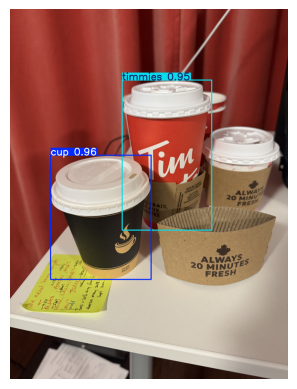

In [38]:
# Run inference
results = torchscript_model("C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/edge_cases/IMG_1386.png");
display_annotated_image(results)

# To run flask app:

python victor_flask_app.py

In [ ]:
curl -X POST http://127.0.0.1:5000/predict -F "C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/edge_cases/IMG_1386.png" -F "model=model_0"


In [60]:
import requests

# URL of the API endpoint
url = "http://127.0.0.1:5000/predict"

# Path to the image
image_path = "C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/edge_cases/IMG_1386.png"

# Open the image file in binary mode and send it in a POST request with the correct key "image"
with open(image_path, "rb") as image_file:
    files = {"image": image_file}
    response = requests.post(url, files=files)

# Print the JSON response from the API
print(response.json())


{'model_used': 'model_0', 'predictions': [{'bbox': [622, 2255, 2177, 4179], 'confidence': 0.96, 'label': 'paper_cup'}, {'bbox': [1723, 1094, 3112, 3429], 'confidence': 0.91, 'label': 'timmies'}]}


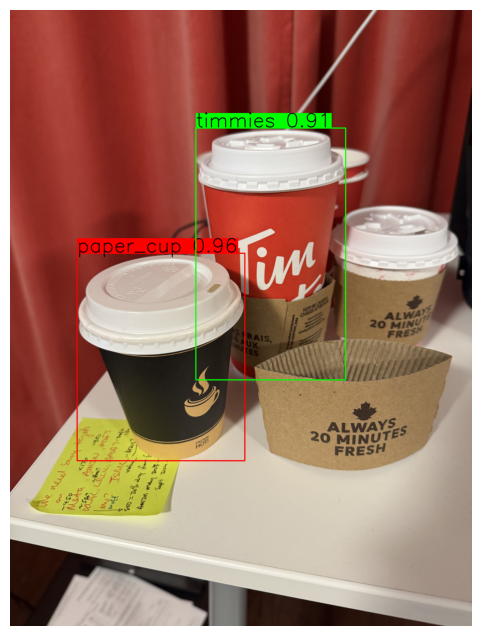

In [64]:
visualize_api_results(response.json(), image_path)

In [65]:
import requests

#requests.get("http://127.0.0.1:5000/management/models/model_0/describe").json()

url = "http://127.0.0.1:5000/management/models/model_0/describe" #Model Info

# Send a GET request to the endpoint
response = requests.get(url)

if response.status_code == 200:
    model_info = response.json()
    print(model_info)
else:
    print("Error:", response.status_code, response.text)


{'config': {'batch_size': 1, 'confidence_threshold': 0.6, 'input_size': [640, 640]}, 'date_registered': '2025-03-31', 'model': 'model_0'}


In [68]:
#Health Check
requests.get("http://127.0.0.1:5000/health-status").json()

{'server': 'Flask', 'status': 'Healthy', 'uptime': '0:00:32'}

In [69]:
#List Available Models
requests.get("http://127.0.0.1:5000/management/models").json()

{'available_models': ['model_0']}

In [70]:
#Group Info

requests.get("http://127.0.0.1:5000/group-info").json()

{'group': 'group3', 'members': ['Alice', 'Bob', 'Charlie']}

In [71]:
#Metrics

requests.get("http://127.0.0.1:5000/metrics").json()


{'avg_latency_ms': 162.5,
 'max_latency_ms': 200,
 'request_rate_per_minute': 0,
 'total_requests': 0}

In [ ]:
#Change Default Model
requests.get("http://127.0.0.1:5000/management/models/model_0/set-default").json()

# With yolo handler

torchserve --start --ncs --model-store model_store --models yolo_v11m=yolo11_v11m_victor.mar,other_model=other_model_file.mar --ts-config config.properties --disable-token-auth --enable-model-api

In [ ]:
image_path = "C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/edge_cases/IMG_1386.png"


In [34]:
!curl -X GET http://127.0.0.1:8080/ping

{
  "status": "Healthy"
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    26  100    26    0     0    917      0 --:--:-- --:--:-- --:--:--   928


In [35]:
!curl -X GET http://127.0.0.1:8081/models

{
  "models": [
    {
      "modelName": "yolo_v11m",
      "modelUrl": "endpoint_yolo_v11m.mar"
    }
  ]
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   109  100   109    0     0  18055      0 --:--:-- --:--:-- --:--:-- 18166


In [51]:
!curl -X GET http://127.0.0.1:8081/models/yolo_v11m

[
  {
    "modelName": "yolo_v11m",
    "modelVersion": "1.0",
    "modelUrl": "yolo11_v11m_victor.mar",
    "runtime": "python",
    "minWorkers": 2,
    "maxWorkers": 2,
    "batchSize": 1,
    "maxBatchDelay": 100,
    "responseTimeout": 120,
    "startupTimeout": 120,
    "maxRetryTimeoutInSec": 300,
    "clientTimeoutInMills": 0,
    "parallelType": "",
    "parallelLevel": 0,
    "deviceType": "gpu",
    "continuousBatching": false,
    "useJobTicket": false,
    "useVenv": false,
    "stateful": false,
    "sequenceMaxIdleMSec": 0,
    "sequenceTimeoutMSec": 0,
    "maxNumSequence": 0,
    "maxSequenceJobQueueSize": 0,
    "loadedAtStartup": true,
    "workers": [
      {
        "id": "9000",
        "startTime": "2025-04-06T17:10:09.896Z",
        "status": "READY",
        "memoryUsage": 0,
        "pid": 1576,
        "gpu": true,
        "gpuUsage": "gpuId::1 utilization.gpu [%]::1 % utilization.memory [%]::6 % memory.used [MiB]::1417 MiB"
      },
      {
        "id": "90

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1369  100  1369    0     0  12668      0 --:--:-- --:--:-- --:--:-- 12559
100  1369  100  1369    0     0  12653      0 --:--:-- --:--:-- --:--:-- 12559


In [100]:
!curl -X POST http://127.0.0.1:8080/predictions/yolo_v11m -T "C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/edge_cases/IMG_1386.png"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 12.2M    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [37]:
import requests
import os

def predict_single_image(image_path, url="http://127.0.0.1:8080/predictions/yolo_v11m"):
    """
    Sends a single image to the TorchServe inference endpoint and returns the prediction.

    Parameters:
        image_path (str): Path to the image file.
        url (str): Inference endpoint URL for the model.

    Returns:
        dict: The JSON response from the server containing predictions.
    """
    if not os.path.exists(image_path):
        raise ValueError(f"Image path does not exist: {image_path}")

    filename = os.path.basename(image_path)
    
    with open(image_path, "rb") as image_file:
        files = {
            "data": (filename, image_file, "image/jpeg"),
            "filename": (None, filename)  # Passing the filename as a separate form field
        }
        response = requests.post(url, files=files)

    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Prediction for {filename} failed with status code {response.status_code}")

# Example usage:
if __name__ == "__main__":
    image_path = r"C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\test_images\aug_background_copy_paste_112.jpeg"
    try:
        predictions = predict_single_image(image_path)
        print("Predictions:", predictions)
    except Exception as e:
        print("Error:", e)


Predictions: {'predictions': [{'label': 'timmies', 'confidence': 0.97, 'bbox': [1413, 430, 1982, 868]}, {'label': 'timmies', 'confidence': 0.97, 'bbox': [26, 1324, 613, 1748]}, {'label': 'paper_cup', 'confidence': 0.97, 'bbox': [36, 482, 473, 1052]}, {'label': 'timmies', 'confidence': 0.96, 'bbox': [970, 6, 1379, 618]}, {'label': 'paper_cup', 'confidence': 0.93, 'bbox': [916, 739, 1453, 1189]}]}


In [60]:
!curl -X POST http://127.0.0.1:6001/predict \
  -F "image=@C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\test_images\aug_background_copy_paste_112.jpeg" \
  -F "model=yolo_v11m"

{"error":"404 Client Error: Not Found for url: http://127.0.0.1:8080/predictions/model_1"}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1329k  100    91  100 1329k   3740  53.3M --:--:-- --:--:-- --:--:-- 54.1M


In [97]:
!curl -X POST http://127.0.0.1:6001/predict \
  -F "image=@C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\test_images\aug_background_copy_paste_112.jpeg" \
  -F "model=model_1"

{"predictions": [{"label": "timmies", "confidence": 0.97, "bbox": [1413, 430, 1982, 868]}, {"label": "timmies", "confidence": 0.97, "bbox": [26, 1324, 613, 1748]}, {"label": "paper_cup", "confidence": 0.97, "bbox": [36, 482, 473, 1052]}, {"label": "timmies", "confidence": 0.96, "bbox": [970, 6, 1379, 618]}, {"label": "paper_cup", "confidence": 0.93, "bbox": [916, 739, 1453, 1189]}], "model_used": "model_1"}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1329k    0     0  100 1329k      0  1318k  0:00:01  0:00:01 --:--:-- 1320k
100 1329k    0     0  100 1329k      0   660k  0:00:02  0:00:02 --:--:--  660k
100 1329k  100   410  100 1329k    155   503k  0:00:02  0:00:02 --:--:--  503k


### 1. Inference Endpoint - /predict

In [28]:
!curl -X POST http://127.0.0.1:6001/predict \
  -F "image=@C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\edge_cases\IMG_1386.png" \
  -F "model=model_0"

{"predictions": [{"label": "paper_cup", "confidence": 0.96, "bbox": [624, 2256, 2175, 4174]}, {"label": "timmies", "confidence": 0.95, "bbox": [1728, 1097, 3108, 3413]}], "model_used": "model_0"}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12.2M  100   195  100 12.2M    313  19.5M --:--:-- --:--:-- --:--:-- 19.6M


In [29]:
!curl -X POST http://127.0.0.1:6001/predict \
  -F "image=@C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\edge_cases\IMG_1386.png" \
  -F "model=model_1"

{"predictions": [{"label": "paper_cup", "confidence": 0.96, "bbox": [629, 2261, 2179, 4177]}, {"label": "timmies", "confidence": 0.94, "bbox": [1734, 1096, 3111, 3411]}, {"label": "paper_cup", "confidence": 0.48, "bbox": [2971, 1799, 4191, 3107]}], "model_used": "model_1"}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12.2M    0     0  100 12.2M      0  10.0M  0:00:01  0:00:01 --:--:-- 10.0M
100 12.2M    0     0  100 12.2M      0  5621k  0:00:02  0:00:02 --:--:-- 5622k
100 12.2M    0     0  100 12.2M      0  3869k  0:00:03  0:00:03 --:--:-- 3870k
100 12.2M  100   273  100 12.2M     80  3685k  0:00:03  0:00:03 --:--:-- 3684k
100 12.2M  100   273  100 12.2M     80  3685k  0:00:03  0:00:03 --:--:-- 3684k


In [30]:
!curl -X POST http://127.0.0.1:6001/predict \
  -F "image=@C:\Users\admin\Downloads\IMG_0903.jpg"\
  #-F "model=yolo_v11m"

{"predictions": [{"label": "paper_cup", "confidence": 0.97, "bbox": [750, 1247, 1932, 2752]}, {"label": "timmies", "confidence": 0.96, "bbox": [2256, 1720, 3931, 3891]}, {"label": "timmies", "confidence": 0.95, "bbox": [1897, 417, 3125, 2316]}], "model_used": "model_0"}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7153k  100   270  100 7152k    532  13.7M --:--:-- --:--:-- --:--:-- 13.8M
curl: (3) URL rejected: No host part in the URL
curl: (3) URL rejected: Bad hostname


In [36]:
import requests
import matplotlib.pyplot as plt
import cv2

# 1) Call your REST API and get back the JSON
def call_predict_api(
    image_path: str,
    url: str = "http://127.0.0.1:6001/predict",
    model: str = None
) -> dict:
    """
    Sends image at image_path to the /predict endpoint.
    Optional `model` string picks which model to run.
    Returns the parsed JSON response.
    """
    files = {"image": open(image_path, "rb")}
    data  = {}
    if model:
        data["model"] = model

    resp = requests.post(url, files=files, data=data)
    resp.raise_for_status()
    return resp.json()

# 4) Visualizer
def visualize_api_results(api_result: dict, image_path: str):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not load image at {image_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for pred in api_result.get("predictions", []):
        label = pred["label"]
        score = pred["confidence"]
        x1, y1, x2, y2 = map(int, pred["bbox"])

        box_color = get_color_for_label(label)
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), box_color, thickness=5)

        text = f"{label} {score:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1.0
        text_thick = 2
        (w, h), _ = cv2.getTextSize(text, font, font_scale, text_thick)

        # background rectangle
        cv2.rectangle(
            img_rgb,
            (x1, y1 - h - 6),
            (x1 + w, y1),
            box_color,
            thickness=-1
        )
        # bold text
        put_bold_text(img_rgb, text, (x1, y1 - 4), font, font_scale, text_thick, (255,255,255))

    plt.figure(figsize=(8,8))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

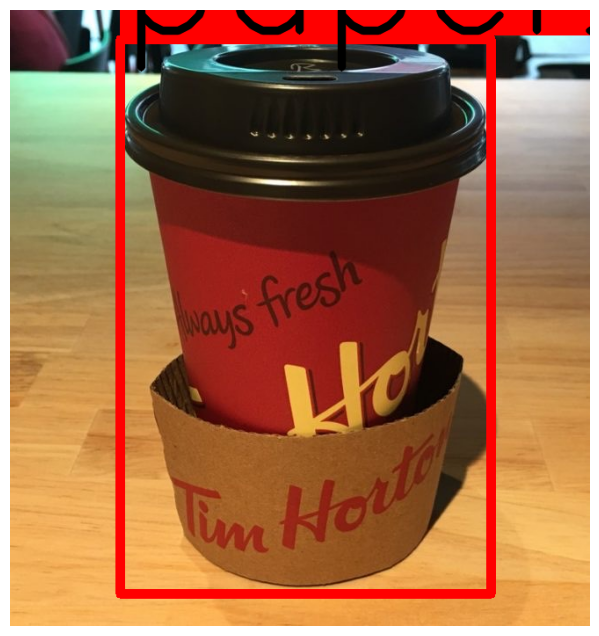

In [47]:
# 1. Pick your image path
image_path = "C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/final_assignment/Test_Set_Initial_For Students/images/image_19.jpeg"

# 2. Call the API and capture its JSON
api_result = call_predict_api(image_path, model="model_1")

# 3. Pass it straight into the visualizer
visualize_api_results(api_result, image_path)


### 2. Health Check Endpoint – /health-status

In [48]:
!curl -X GET http://127.0.0.1:6001/health-status

{
  "server": "Flask",
  "status": "Unhealthy",
  "uptime": "0 days, 0 hours, 17 minutes"
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100    92  100    92    0     0     45      0  0:00:02  0:00:02 --:--:--    45
100    92  100    92    0     0     45      0  0:00:02  0:00:02 --:--:--    45


### 3. Model Management (List Models) – /management/models

In [20]:
!curl -X GET http://127.0.0.1:6001/management/models

{
  "available_models": [
    "model_0",
    "model_1",
    "model_2"
  ]
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    76  100    76    0     0  39936      0 --:--:-- --:--:-- --:--:-- 76000


### 4. Group Info  – /group-info

In [21]:
!curl -X GET http://127.0.0.1:6001/group-info

{
  "group": "group1",
  "members": [
    "Anna Kudiakova",
    "Salar Jalali",
    "Victor Sung",
    "Jieming Yu"
  ]
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   122  100   122    0     0  65910      0 --:--:-- --:--:-- --:--:--  119k


### 5. Metrics  – /metrics

In [49]:
!curl -X GET http://127.0.0.1:6001/metrics

{
  "avg_latency_ms": 270.34,
  "max_latency_ms": 1041.82,
  "request_rate_per_minute": 13.07,
  "total_requests": 229
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   121  100   121    0     0  62403      0 --:--:-- --:--:-- --:--:--  118k


### 6. Model Info (Describe)  – /describe


In [23]:
!curl -X GET http://127.0.0.1:6001"/management/models/model_0/describe

{
  "config": {
    "batch_size": 16,
    "confidence_threshold": 0.6,
    "input_size": [
      640,
      640
    ]
  },
  "date_registered": "2025-04-20",
  "model": "model_0"
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   181  100   181    0     0  89426      0 --:--:-- --:--:-- --:--:--  176k


In [24]:
!curl -X GET http://127.0.0.1:6001"/management/models/model_1/describe

{
  "config": {
    "batch_size": 16,
    "confidence_threshold": 0.4,
    "input_size": [
      640,
      640
    ]
  },
  "date_registered": "2025-04-20",
  "model": "model_1"
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   181  100   181    0     0    98k      0 --:--:-- --:--:-- --:--:--  176k


In [25]:
!curl -X GET http://127.0.0.1:6001"/management/models/model_2/describe

{
  "config": {
    "batch_size": 16,
    "confidence_threshold": 0.5,
    "input_size": [
      640,
      640
    ]
  },
  "date_registered": "2025-04-20",
  "model": "model_2"
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   181  100   181    0     0  84342      0 --:--:-- --:--:-- --:--:-- 90500


### 7. Change Default Model  – /set-default

In [26]:
!curl -X GET http://127.0.0.1:6001/management/models/model_1/set-default

{
  "default_model": "model_1",
  "success": true
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    52  100    52    0     0  29279      0 --:--:-- --:--:-- --:--:-- 52000


In [27]:
!curl -X GET http://127.0.0.1:6001/management/models/model_0/set-default

{
  "default_model": "model_0",
  "success": true
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    52  100    52    0     0  24586      0 --:--:-- --:--:-- --:--:-- 26000
